### Project Name: US Accidents Dataset
### Team member: Gauri Kulkarni(823697401) , Shweta Nazarkar(823812620)

### Goal: To analyze the US accident dataset and find out factors contributing to accidents. Predict the severity of accident on the basis of weather condition, infrastructure and location.

In [1]:
# IMPORT PACKAGES AND MODULES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Read US Accidents dataset

In [2]:
us_accidents_path = "D:\\Big Data\\Project\\us-accidents\\"
us_accidents_filename = "US_Accidents_Dec19.csv"

#us_accidents_path = "/Users/gaurikulkarni/Downloads/"
#us_accidents_filename = "US_Accidents_Dec19.csv"

In [3]:
#read csv file into dataframe
us_accident_data = pd.read_csv(us_accidents_path+us_accidents_filename)
us_accident_data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


-------------

### Accident count per state 

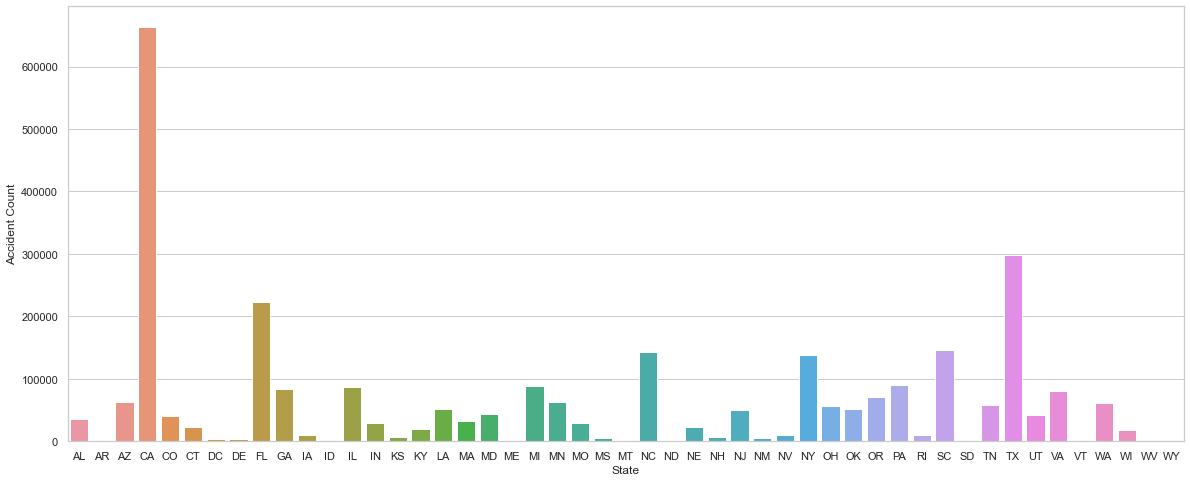

In [4]:
#find out number of accident cases for each state and plot the bar graph for it
def stateByCount(df_data):
    df_result = df_data.groupby(['State'])['ID'].count()
    return df_result

state_by_data = stateByCount(us_accident_data)

state_by_accidnets = pd.DataFrame(state_by_data).reset_index()
state_by_accidnets.columns = ['State','Accident Count']

sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
ax = sns.barplot(x="State", y="Accident Count", data=state_by_accidnets)

#### Analysis:From the above graph we can see that California has highest number of accident cases followed by Texas.

---------

#### Since we found out CA has highest number of accident cases, here we will find out number of accidents in each city of CA.

In [5]:
city_data = us_accident_data[us_accident_data['State']=='CA']['City'].value_counts()
city_data = pd.DataFrame(city_data).reset_index()
city_data.columns = ['City','Count']
city_data.head(50)

,City,Count
0,Los Angeles,65851
1,Sacramento,25657
2,San Diego,21045
3,San Jose,17395
4,Oakland,11602
5,Riverside,10249
6,Long Beach,9743
7,Anaheim,8480
8,San Francisco,8314
9,Corona,7620


#### Analysis: From above result we can see that Los Angeles in CA has the highest number of accident cases.

---------------

### Total number of accident cases for each year from 2015 to 2020

,Year,Accident Count
0,2015,1
1,2016,410600
2,2017,717483
3,2018,892615
4,2019,953630
5,2020,6


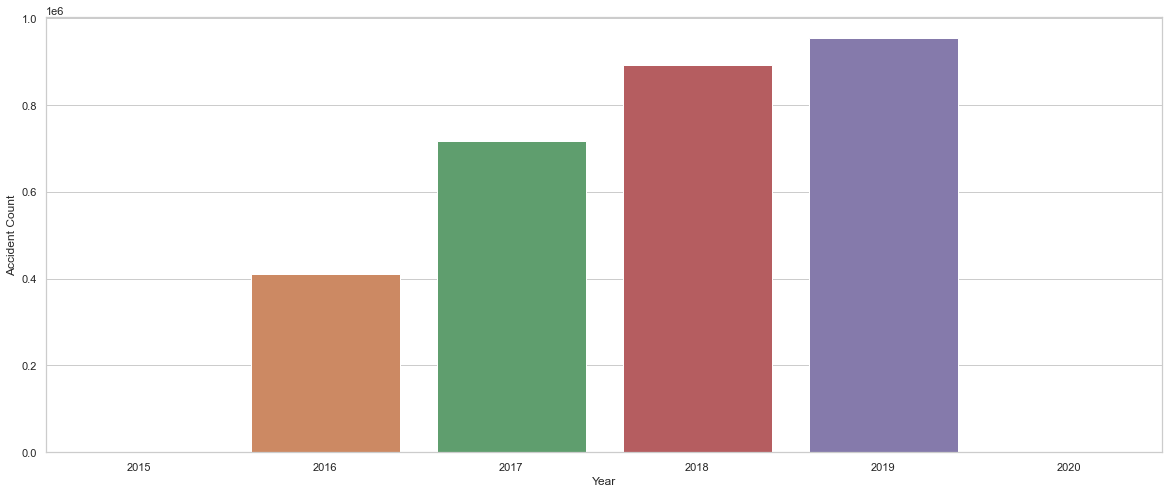

In [6]:
us_accident_data['Date'] = us_accident_data['Start_Time'].str.split(n=1).str[0]
daily_accident_data = us_accident_data.groupby(['Date'])['ID'].count()
us_accident_data_yearly = pd.DatetimeIndex(us_accident_data['Date']).year
us_accident_data_yearly = pd.DataFrame(us_accident_data_yearly)
us_accident_data_yearly = us_accident_data_yearly.groupby('Date').size()
us_accident_data_yearly = pd.DataFrame(us_accident_data_yearly).reset_index()
us_accident_data_yearly.columns = ['Year','Accident Count']

sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Year", y="Accident Count", data=us_accident_data_yearly)
us_accident_data_yearly

#### Analysis: From the above graph we can see that 2019 has recorded highest number of accident cases.

----------

### Weather Condition with severity

C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

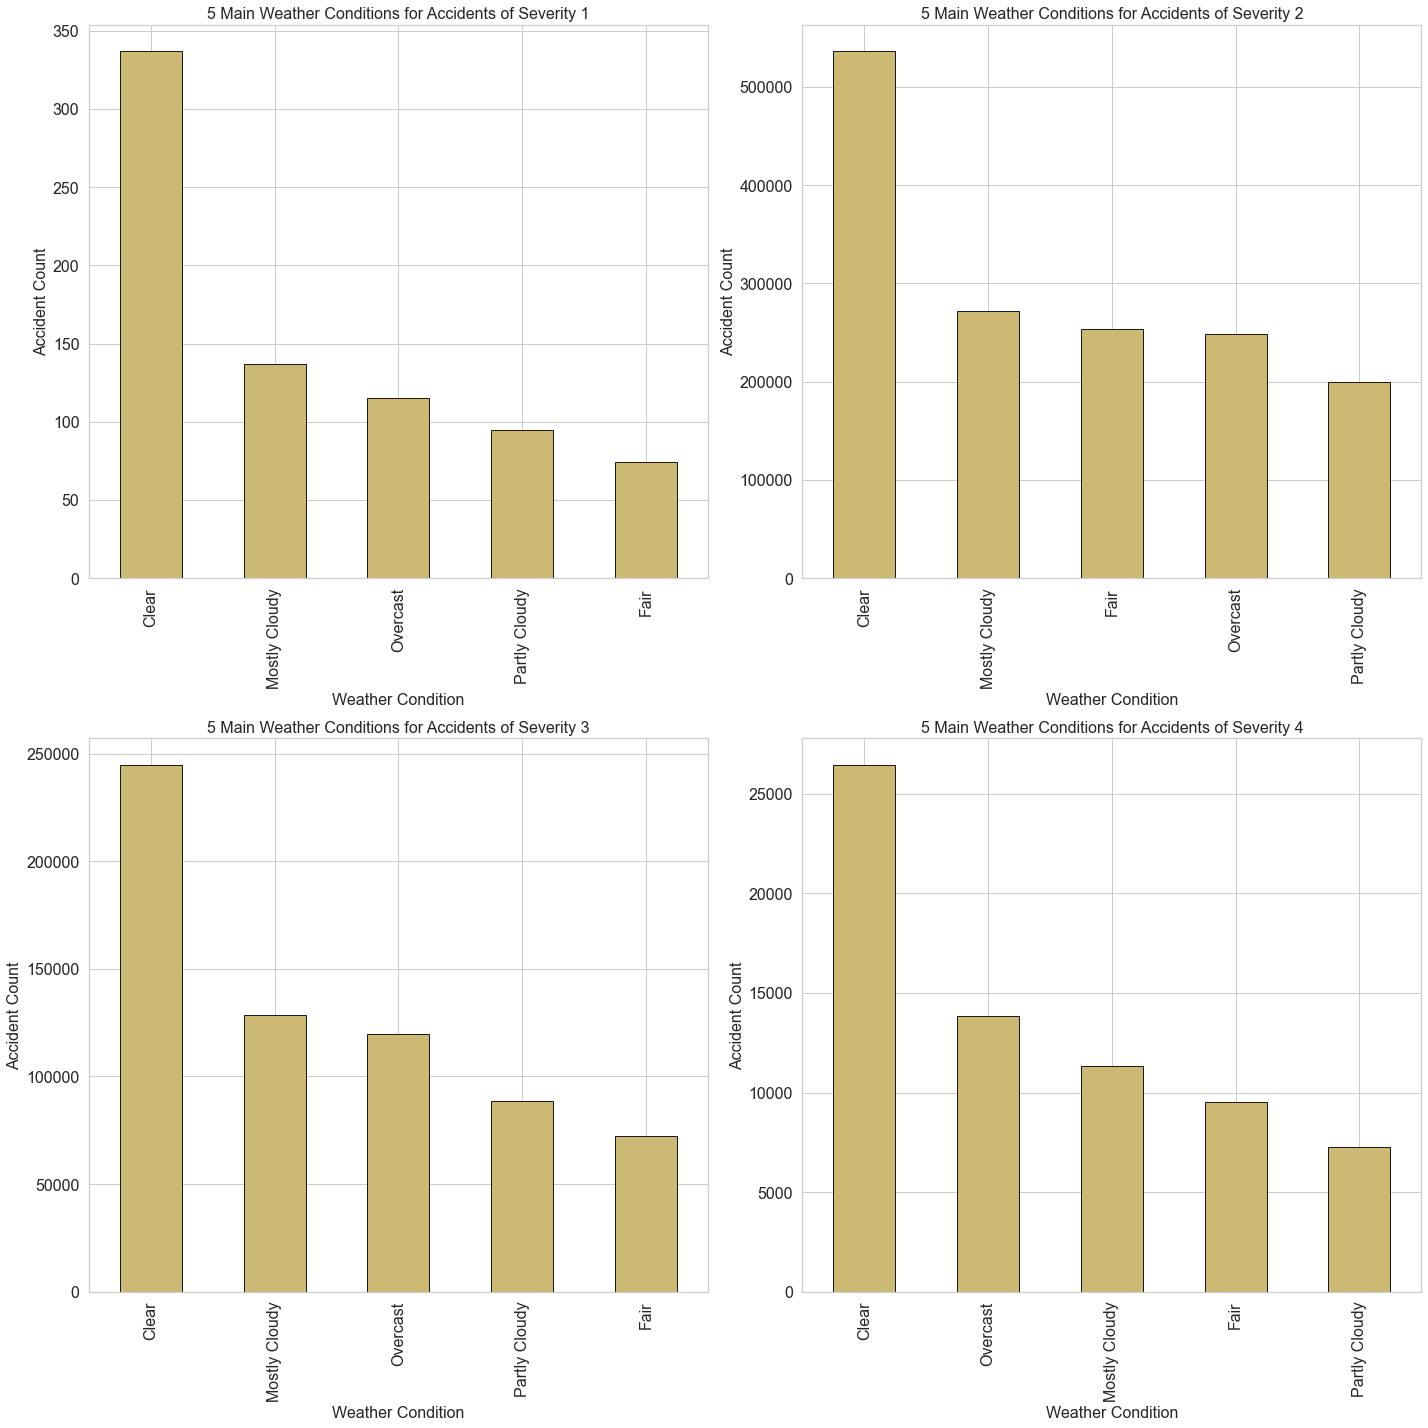

In [9]:
plt.subplots(2,2,figsize=(20,20))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    us_accident_data.loc[us_accident_data["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('5 Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

#### Analysis: From above graphs we can see that most accidents with all severity have occured under clear weather condition. It could be due to the percentage of clear days is high or people tend to drive fast and pay less attention in good weather condition. On the other hand when weather condition is bad like rainy, foggy,snowy weather, people drive cautiously. Hence, least accidents occured in bad weather condition.  

### Severity wise accident count

In [53]:
severity_count =  us_accident_data['Severity'].value_counts()
severity_count = pd.DataFrame(severity_count).reset_index()
severity_count.columns = ['Severity Range','Count']
severity_count

,Severity Range,Count
0,2,1993410
1,3,887620
2,4,92337
3,1,968


#### Analysis: From the above data it is clear that most accidents are light accident with severity 2 while most severe with severity 1 are the least.

-----------

### Impact of infrastructure for accidents

Text(0.5, 1.0, 'Infrastructure object contribution to accident')

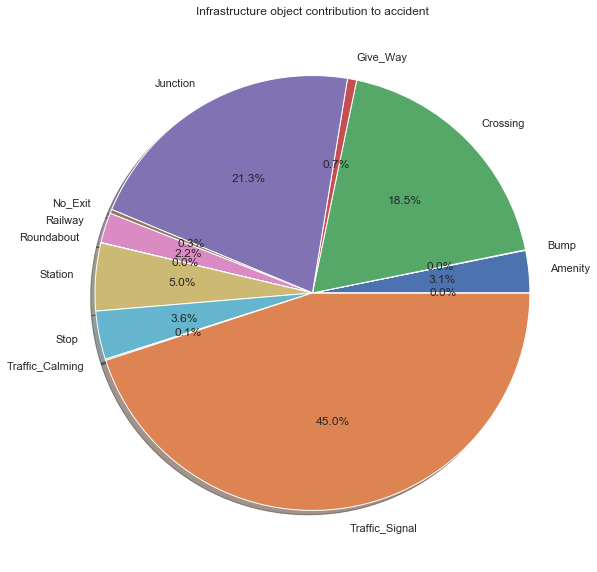

In [54]:
bool_cols = [col for col in us_accident_data.columns if us_accident_data[col].dtype == np.dtype('bool')]
bools = us_accident_data[bool_cols].sum(axis=0)

bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Infrastructure object contribution to accident')

#### Analysis: From above pie chart it seems that majority of accident cases has occured at Traffic Signal, Junction and Crossing. One probability could be it is difficult to control the speed which can lead into the bumping of vehicles with infrastrure or other vehicles.

---------

### Infrastructure with severity 

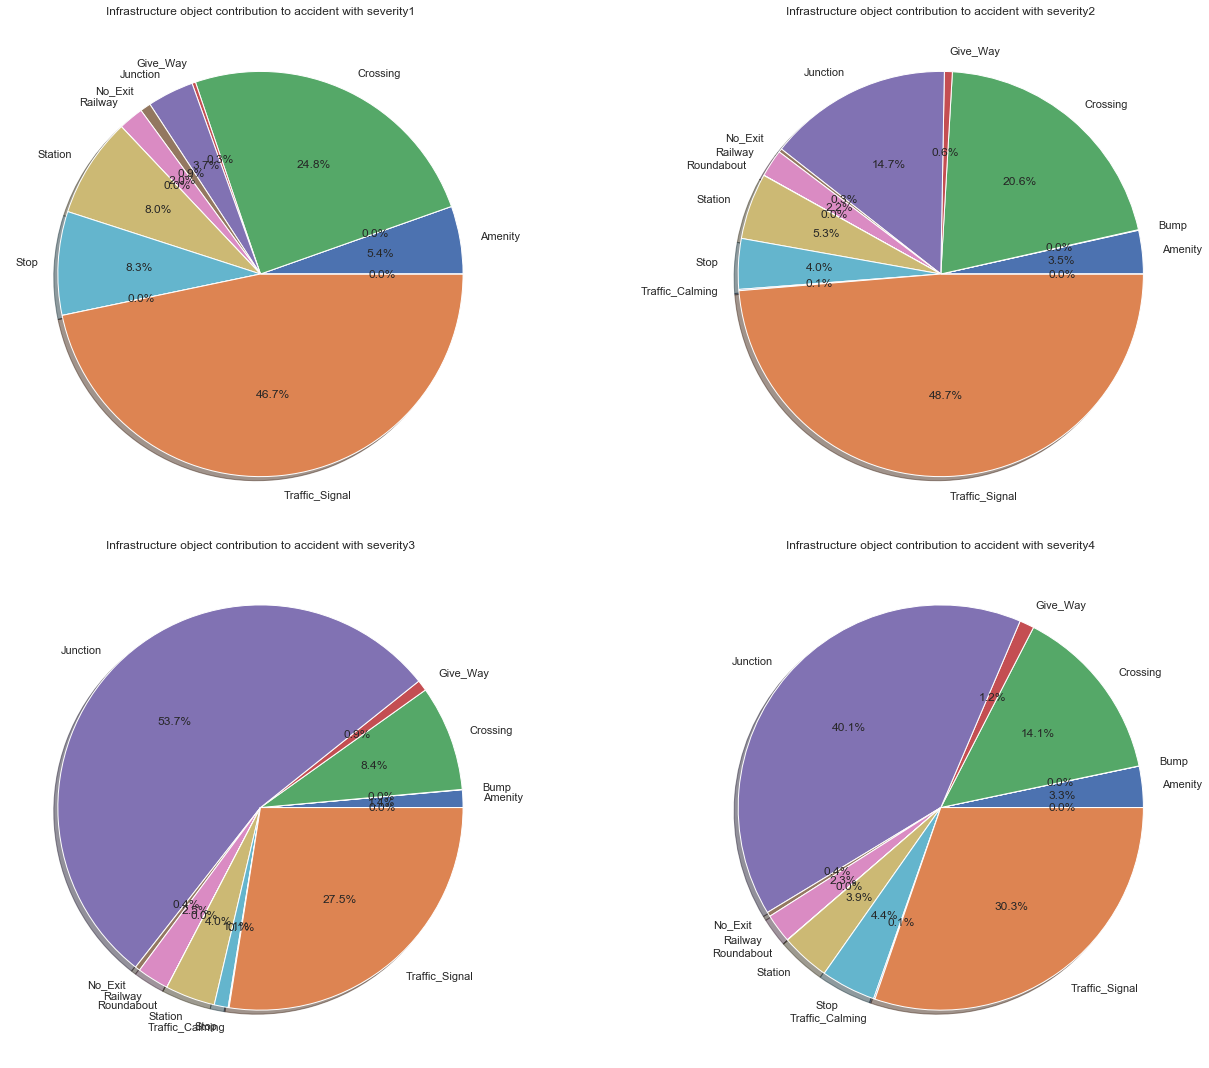

In [70]:
severity_lst = list(severity_count['Severity Range'])
fig= plt.figure(figsize=(20,15))
for i in severity_lst:
    plt.subplot(2, 2, i)

    df = us_accident_data[us_accident_data['Severity'] == i]
    bool_cols = [col for col in df.columns if df[col].dtype == np.dtype('bool')]

    bools = df[bool_cols].sum(axis=0)

    bools.plot.pie(autopct='%1.1f%%',shadow=True)
    plt.ylabel('')
    plt.title('Infrastructure object contribution to accident with severity' + str(i))
plt.tight_layout()
plt.show()

#### Analysis: From the above pie charts we can see that severity 1 and severity 2 accidents have occured mainly at Traffic Signal where Severity 3 and Severity 4 accidents have occured mainly at Junction. Light accidents with severity 1 and 2 are possible at Traffic Signal when driver runs red light or drivers who fails to yield the right-of-way at traffic signals. Severe accidents with severity level 3 and 4 are possible at junction when drivers fails to control the speed of vehicles, collision of vehicles, collision with infrastructure etc.


---------

### State wise severity

In [71]:
state_wise_severity = us_accident_data.groupby(['State','Severity'])['ID'].count()
state_wise_severity = pd.DataFrame(state_wise_severity).reset_index()
state_wise_severity.columns = ['State','Severity','Accident Count']
state_wise_severity

,State,Severity,Accident Count
0,AL,1,18
1,AL,2,23906
2,AL,3,11931
3,AL,4,514
4,AR,2,860
...,...,...,...
183,WV,3,467
184,WV,4,454
185,WY,2,129
186,WY,3,176


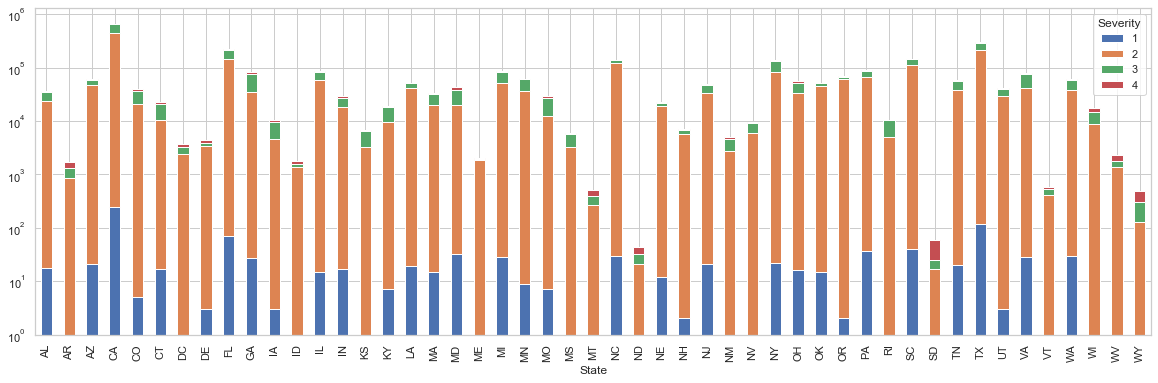

In [72]:
pivot_df = state_wise_severity.pivot(index='State', columns='Severity', values='Accident Count')
pivot_df.plot(kind='bar',figsize=(20,6),stacked=True,logy=True)

#### Analysis:As per the graph we can say that most of the records are of severity level 2 and 3. 

--------

### We will analyse data for 5 topmost states with highest number of accidents for infrastructure conditions, street side and day night condition.

In [10]:
largest_count_states = state_by_accidnets.nlargest(5,'Accident Count')
largest_count_states

,State,Accident Count
3,CA,663204
41,TX,298062
8,FL,223746
38,SC,146689
25,NC,142460


### Top 5 State infrastructure impact

In [12]:
state_list = list(largest_count_states.State)

C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

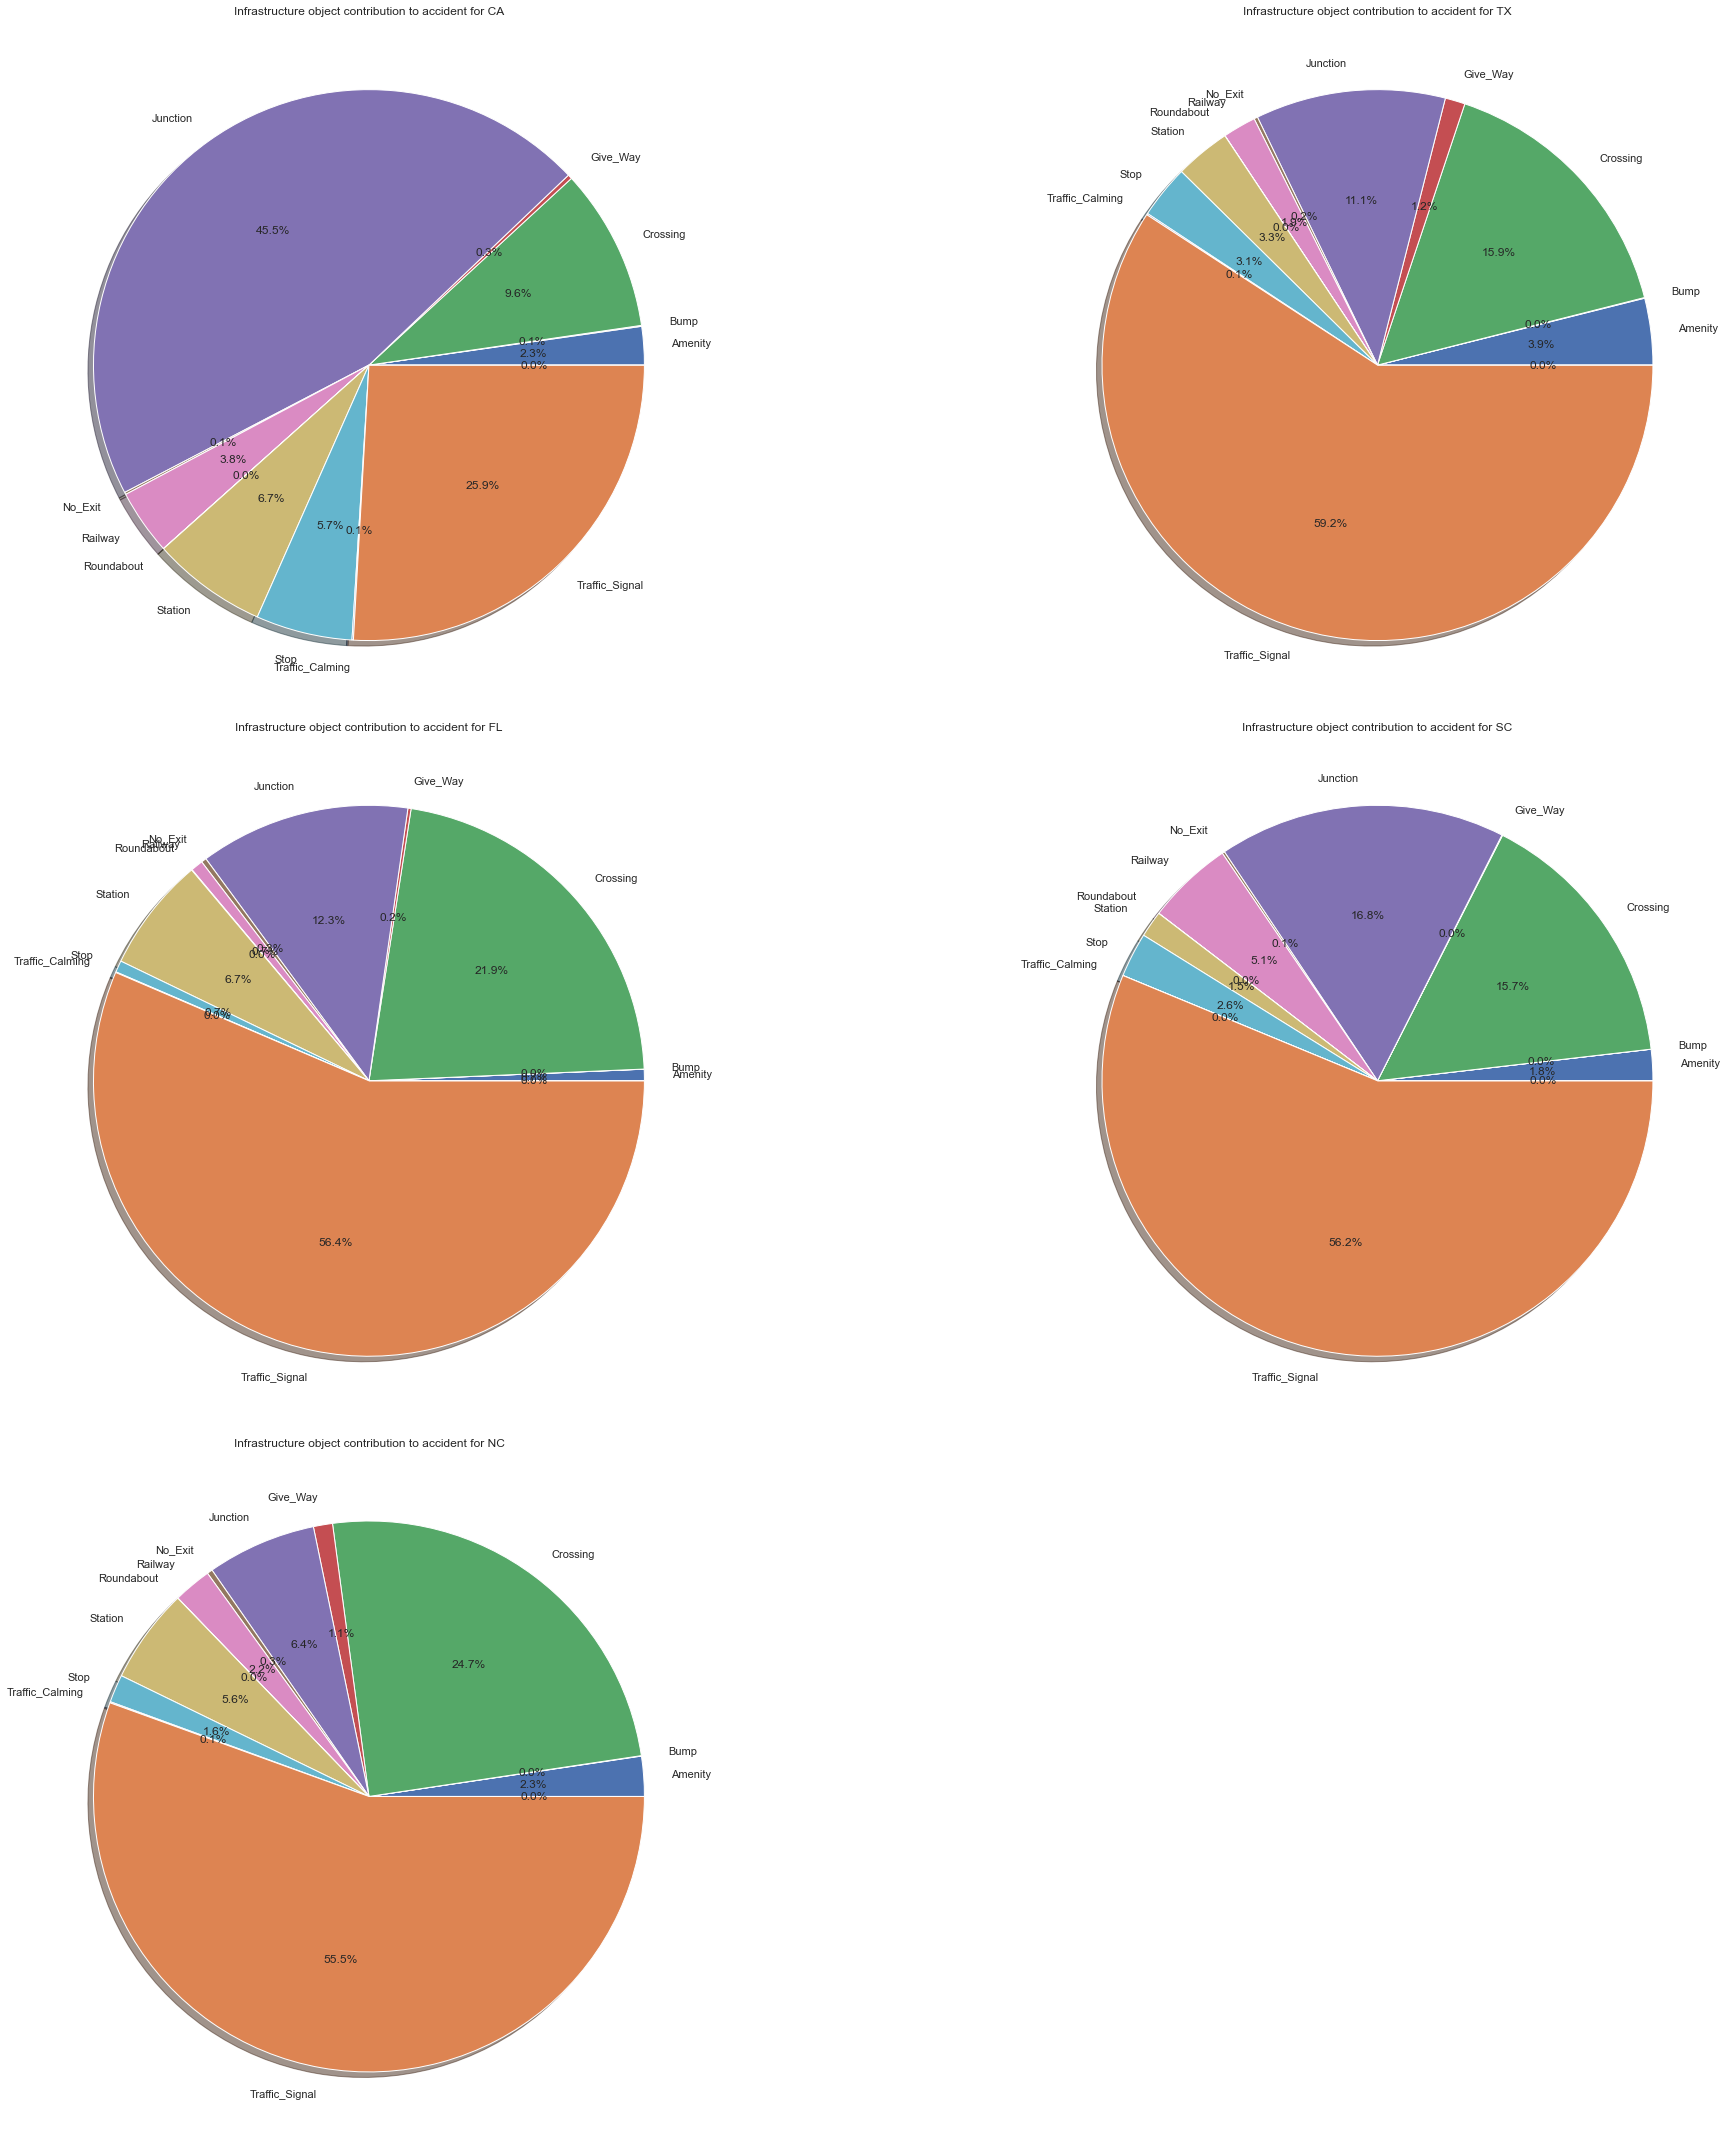

In [13]:
fig= plt.figure(figsize=(30,30))
i = 0
for state in state_list:
    i += 1
    plt.subplot(3, 2, i)

    df = us_accident_data[us_accident_data['State'] == state]
    bool_cols = [col for col in df.columns if df[col].dtype == np.dtype('bool')]

    bools = df[bool_cols].sum(axis=0)

    bools.plot.pie(autopct='%1.1f%%',shadow=True)
    plt.ylabel('')
    plt.title('Infrastructure object contribution to accident for ' + state)
    
plt.tight_layout()
plt.show()

#### Analysis: From the abive pie charts we can see that majority of accident have occured at Traffic signal in states TX,FL,SC,NC. While in CA majority of accidents happened at Junction.

----------------------

### Top 5 State Street side analysis 

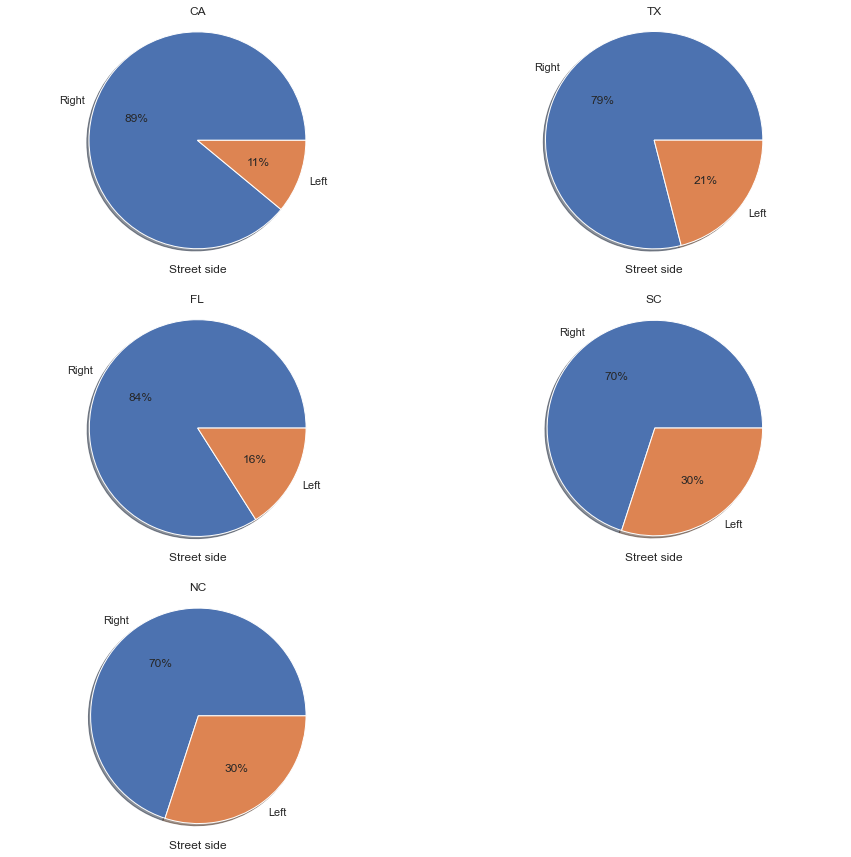

In [14]:
fig= plt.figure(figsize=(15,15))
labels=['Right','Left']
cnt = 0
for state in state_list:
    cnt+=1
    plt.subplot(3, 2, cnt)
     # Slice the dataframe for the specific state and weekday
    street_side=us_accident_data[us_accident_data['State']==state]['Side'].value_counts(normalize=True).round(2)[:2]

    plt.pie(street_side, labels=labels, autopct='%1.0f%%', shadow=True)

    plt.axis('equal')
    plt.xlabel('Street side')
    plt.title('{}'.format(state))

plt.show()

-------

### Analysis: Majority of accidents happened at right side of the street in all state. Blindspot is the main reason for right side accidents. Still significant number of accidents have occured at left side also. 

---------------------------------------------------------------------------------------------------------------

### Top 5 State with Day Night

In [119]:
result_data = []
for state in state_list:
    df_result = us_accident_data[us_accident_data['State'] == state]
    result_data.append(df_result)

day_night = pd.concat(result_data,axis=0,ignore_index=True,sort=False)
state_dn = day_night.groupby(['Sunrise_Sunset','State'])['ID'].count()
state_dn = pd.DataFrame(state_dn).reset_index()
state_dn

,Sunrise_Sunset,State,ID
0,Day,CA,451265
1,Day,FL,170279
2,Day,NC,115009
3,Day,SC,114328
4,Day,TX,230645
5,Night,CA,211933
6,Night,FL,53440
7,Night,NC,27448
8,Night,SC,32361
9,Night,TX,67417


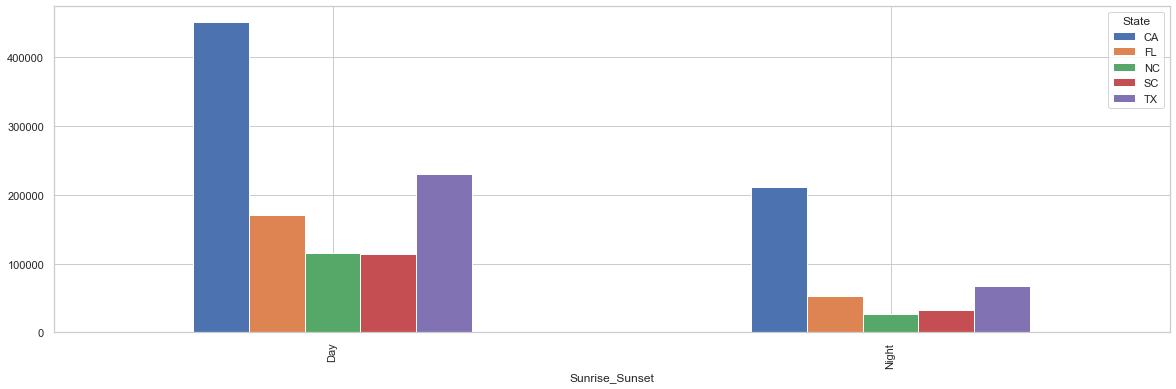

In [120]:
day_night_data = state_dn.pivot(index='Sunrise_Sunset',columns='State',values='ID')
day_night_data.plot(kind='bar',figsize=(20,6))

-----------------------------

#### Analysis: Majority of accidents have happened during day time on contrary to night time. This is because traffic is more in day time. Number of vehicles are less in night time and drivers tend to be cautious during night time.

---------------

### The analysis of data indicates the certain pattern of weather conditions and infrastructure conditions on severity of accident. We can use this pattern to predict the severity from given weather and infrastructure. We are implementing two ML algorithms 1.Logistic Regression 2.Decision Tree Classifier

In [15]:
#convert sunrise sunset data to numerical format
us_accident_ml = us_accident_data[us_accident_data['State'] == 'CA']
us_accident_ml.Sunrise_Sunset.replace({'Day':1,'Night':0},inplace=True)

C:\Users\shwet\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
us_accident_ml = us_accident_ml[['Severity','TMC','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Sunrise_Sunset','Wind_Direction','Pressure(in)','Visibility(mi)','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]

In [17]:
#convert string data to numerical format
weather_data = pd.get_dummies(us_accident_ml['Weather_Condition'],drop_first=True)
wind_data = pd.get_dummies(us_accident_ml['Wind_Direction'],drop_first=True)
us_accident_ml = pd.concat([us_accident_ml,weather_data,wind_data],axis=1)
us_accident_ml = us_accident_ml.drop(['Weather_Condition','Wind_Direction'],axis=1).dropna()

In [18]:
x = us_accident_ml.drop(['Severity'],axis=1)
y = us_accident_ml['Severity']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.predict(X_test)

In [42]:
lr.score(X_test,y_test)

0.6169649600543233

In [45]:
dtf = DecisionTreeClassifier(max_depth=10,criterion='gini',random_state=1)
dtf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [49]:
dtf.predict(X_test)

In [50]:
dtf.score(X_train,y_train)

0.8362222836529437

#### Analysis: By comparing two models Logistic Regression and Decision Tree Classifier we can see from their scores that Decision Tree Classifier has good accuracy of 83 over Logistic which has accuracy of 61.